<a href="https://colab.research.google.com/github/AlexHudnev/data_analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Проверяем наличие базы 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/My Drive/home_data.csv', index_col=0)

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0.5, 1.0, 'Price by sqft_lot')

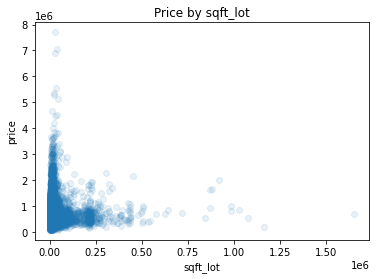

In [ ]:
sqft_lot = data['sqft_lot'].values
price = data['price'].values

plt.scatter(sqft_lot, price, alpha=0.1)

plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('Price by sqft_lot')

Text(0.5, 1.0, 'Price by condition')

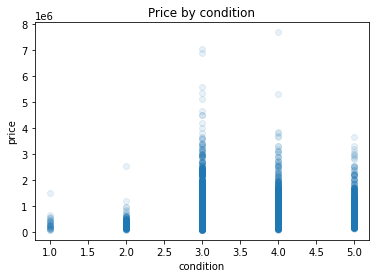

In [ ]:
condition = data['condition'].values
price = data['price'].values

plt.scatter(condition, price, alpha=0.1)

plt.xlabel('condition')
plt.ylabel('price')
plt.title('Price by condition')

Text(0, 0.5, 'price')

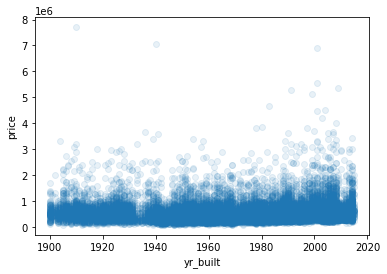

In [ ]:
yr_built = data['yr_built'].values
price = data['price'].values

plt.scatter(yr_built, price, alpha=0.1)

plt.xlabel('yr_built')
plt.ylabel('price')

Text(0.5, 1.0, 'Price by sqft_living')

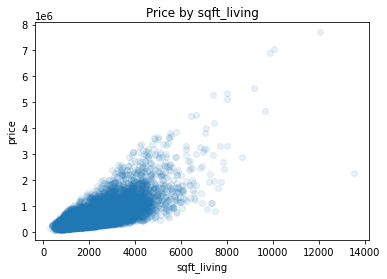

In [ ]:
sqft_living = data['sqft_living'].values
price = data['price'].values

plt.scatter(sqft_living, price, alpha=0.1)

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Price by sqft_living')

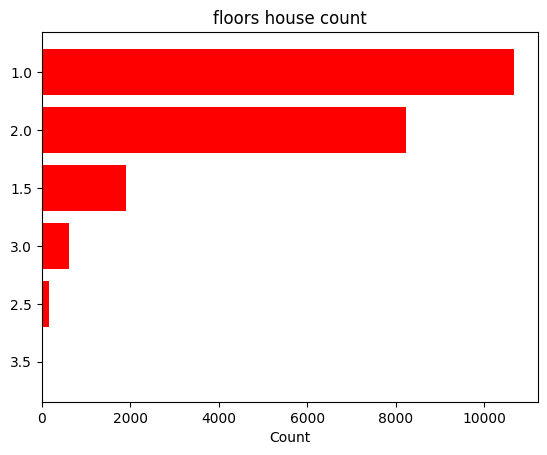

In [ ]:
floors_data = np.unique(data.floors.values, return_counts=True)  
floors_data_count = len(floors_data[0]) 

plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame({
                  'floors': floors_data[0],
                  'counts': floors_data[1]
                  }).sort_values(by=['counts'])

floors = df.floors[::-1]
counts = df.counts[::-1]

positions = np.arange(floors_data_count)

ax.barh(positions, counts, align='center', color='red')
ax.set_yticks(positions)
ax.set_yticklabels(floors)
ax.invert_yaxis()  
ax.set_xlabel('Count')
ax.set_title('floors house count')

plt.show()

Text(0.5, 1.0, 'Price by floors')

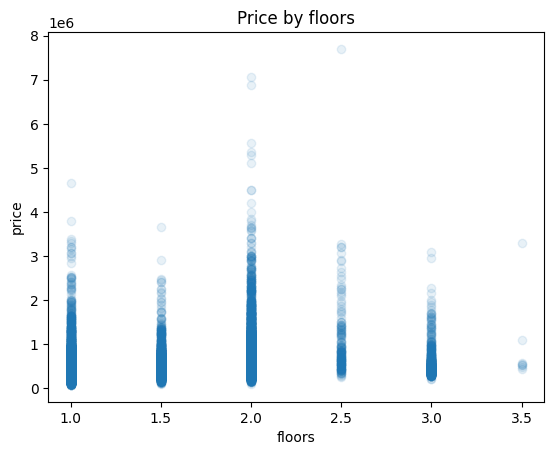

In [ ]:
floors = data['floors'].values
price = data['price'].values

plt.scatter(floors, price, alpha=0.1)

plt.xlabel('floors')
plt.ylabel('price')
plt.title('Price by floors')

## **Поиск аномалий**
**Z-Score**

В статистике, если распределение данных приблизительно нормальное, то около 68% значений данных находятся в пределах одного стандартного отклонения от среднего, а около 95% находятся в пределах двух стандартных отклонений, иоколо 99,7%лежат в пределах трех стандартных отклонений

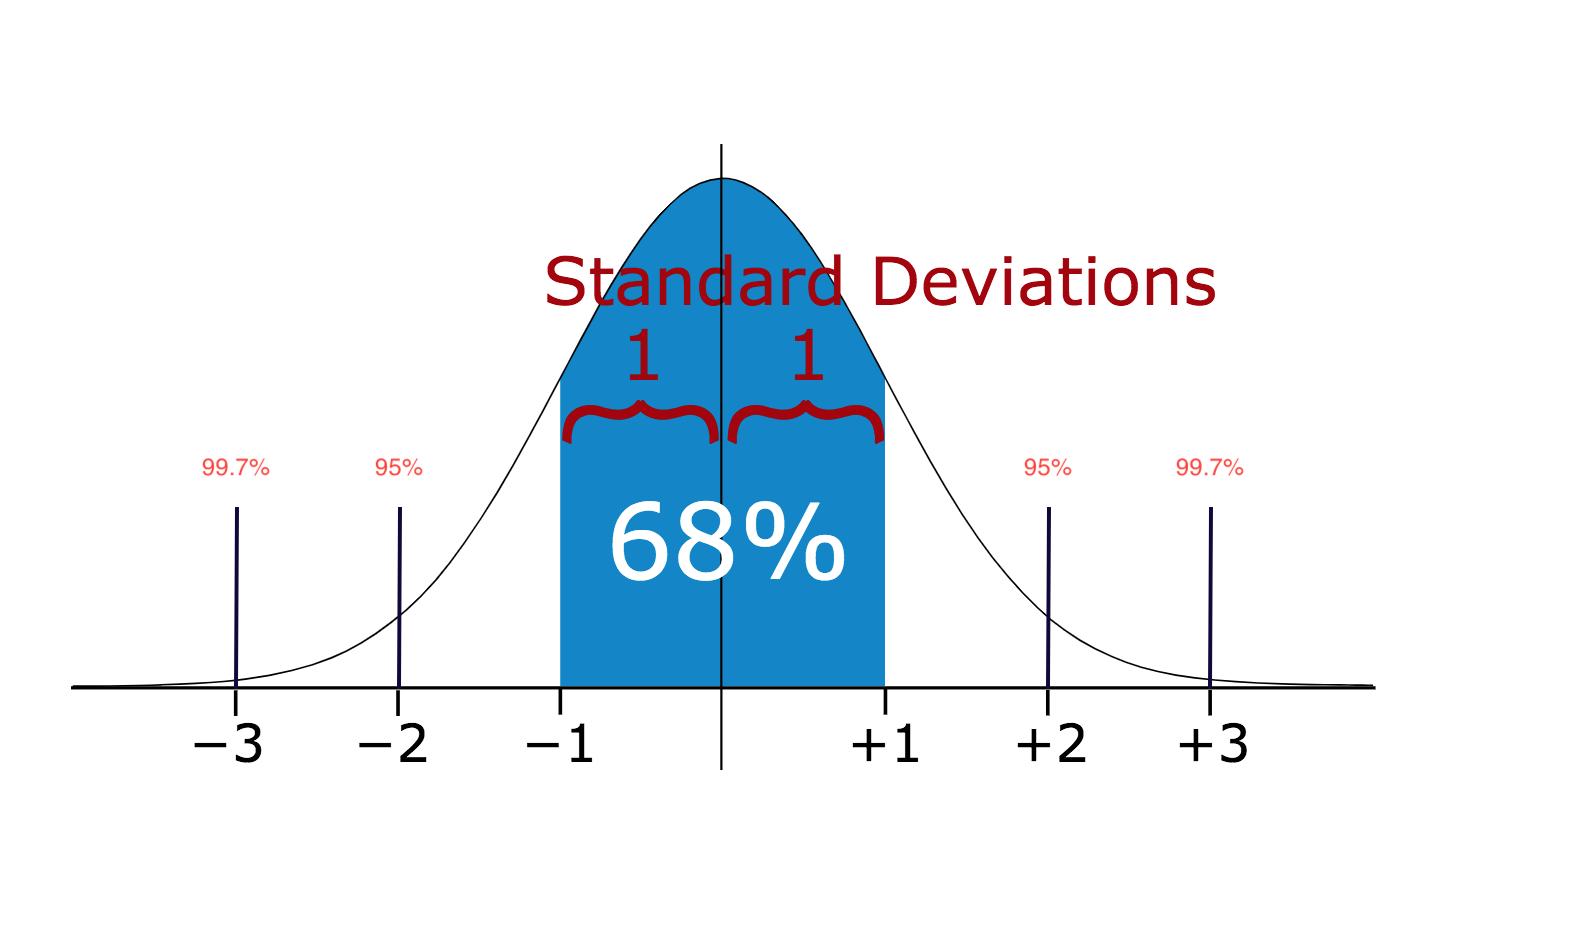




In [ ]:
sqft_living = data['sqft_living'].values
price = data['price'].values
def find_anomalies(data):
    anomalies = []
    data_std = np.std(data)
    data_mean = np.mean(data)
    anomaly_cut_off = data_std * 8
    
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

print(len(find_anomalies(sqft_living)))

-5267.457458793221
5


В итоге мы нашли 248 аномальных точек

 

In [ ]:
anomalies = find_anomalies(sqft_living)

cleaned_data =  data.loc[~data['sqft_living'].isin(anomalies) ]#np.setdiff1d(sqft_living, np.array(anomalies))
cleaned_sqft_living = cleaned_data['sqft_living'].values
cleaned_price = cleaned_data['price'].values

-4349.037809410339


## **Линейная регрессия**

Модель линейной регрессии (linear regression) — часто используемая в статистике модель линейной зависимости одной переменной у от другой, независимой переменной х, или нескольких переменных. В терминах машинного обучения у — это ответ, а множество независимых переменных — признаки. Простая линейная регрессия выглядит как функция свертки множества признаков с весовыми коэффициентами:

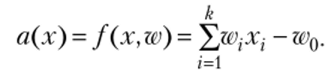

Простми словами задача линейной регрессии заключается в нахождении линии, которая наилучшим образом соответствует данным. Расширения линейной регрессии включают множественную линейную регрессию (например, поиск наиболее подходящей плоскости) и полиномиальную регрессию (например, поиск наиболее подходящей кривой).

Далее построим линеную регрессию по нашим данным и проверим на сколько хорошо она подходит для их обобщения:

-43580.7403270849
[280.62356663]
[  37800.09399667 3756062.35189247]
0.492853214845565


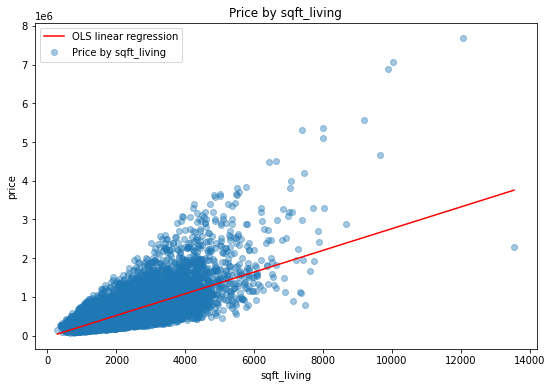

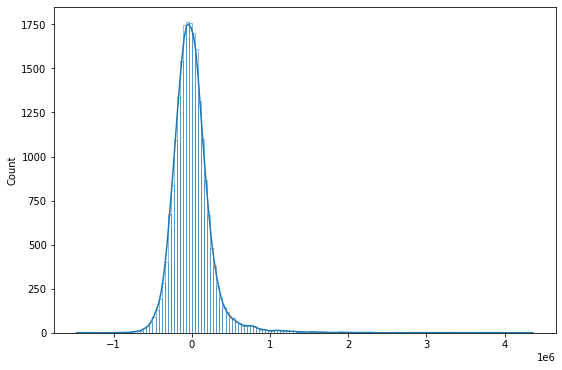

In [ ]:
from sklearn.linear_model import LinearRegression
import seaborn as sns

sqft_living = data['sqft_living'].values
price = data['price'].values

model = LinearRegression()

model.fit(sqft_living.reshape(-1, 1), price)

print(model.intercept_)
print(model.coef_)


# Нарисуем график с обучающими данными и моделью
demo_x = np.array([sqft_living.min(), sqft_living.max()])
demo_y = model.predict(demo_x.reshape(-1, 1))
print(demo_y)

plt.figure(figsize = (9, 6))
plt.scatter(sqft_living, price, label = 'Price by sqft_living', alpha = 0.4)
plt.plot(demo_x, demo_y, color = 'r', label = 'OLS linear regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Price by sqft_living')
plt.legend()

y_predicted = model.predict(sqft_living.reshape(-1,1))

errors = price - y_predicted

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(price, y_predicted))

plt.figure(figsize = (9, 6))
sns.histplot(x=errors,
             bins=150,
             fill=False,
             kde=True);


Данный метод не очень хорошо обобщает эти данные

Точка с большой площадью и мальенькой ценой немного портит качество обучения 


График похож на график нормального распределения





528082.6130924403
[0.79470144]
[ 528495.85783898 1840419.98116838]
0.00803906974100399


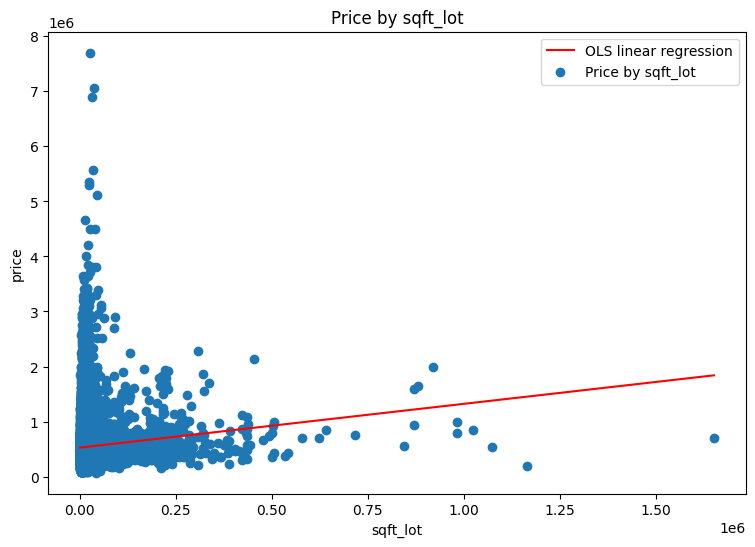

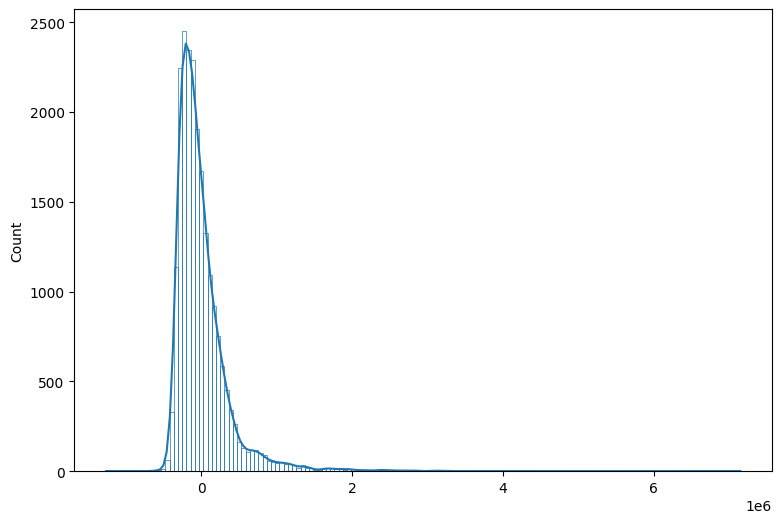

In [ ]:
sqft_lot = data['sqft_lot'].values
price = data['price'].values

model = LinearRegression()

model.fit(sqft_lot.reshape(-1, 1), price)

print(model.intercept_)
print(model.coef_)


# Нарисуем график с обучающими данными и моделью
demo_x = np.array([sqft_lot.min(), sqft_lot.max()])
demo_y = model.predict(demo_x.reshape(-1, 1))
print(demo_y)

plt.figure(figsize = (9, 6))
plt.scatter(sqft_lot, price, label = 'Price by sqft_lot')
plt.plot(demo_x, demo_y, color = 'r', label = 'OLS linear regression')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('Price by sqft_lot')
plt.legend()

y_predicted = model.predict(sqft_lot.reshape(-1,1))
print(r2_score(price, y_predicted))
errors = price - y_predicted
# plt.figure(figsize = (9, 6))
# plt.plot(errors)
plt.figure(figsize = (9, 6))
sns.histplot(x=errors,
             bins=150,
             fill=False,
             kde=True);
        

Для таких данных данный метод не подходит, т.к ргафик регрессии проходит не через основное множество точек.

Графих ошибок не очень похож на график нормального распределения, а значит данные не подходят для линейного обобщения.

Разделим данные на тренировочные и тестовые, и вычислим R^2,MSE и MAE 

**Средняя квадратичная ошибка (англ. Mean Squared Error, MSE)**
MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок. 

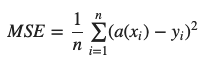

**Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE)**

Среднеквадратичный функционал сильнее штрафует за большие отклонения по сравнению со среднеабсолютным, и поэтому более чувствителен к выбросам. При использовании любого из этих двух функционалов может быть полезно проанализировать, какие объекты вносят наибольший вклад в общую ошибку — не исключено, что на этих объектах была допущена ошибка при вычислении признаков или целевой величины.

Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводов о том, на сколько хорошо данная модель решает задачу. Например, MSE = 10 является очень плохим показателем, если целевая переменная принимает значения от 0 до 1, и очень хорошим, если целевая переменная лежит в интервале (10000, 100000). В таких ситуациях вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации — R2


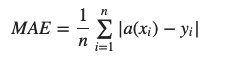

**Коэффициент детерминации**

Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

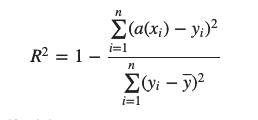

R2= 0.4944752772764651
MSE= 68770889503.66118
MAE= 175021.88250555424
0.49108628745254956


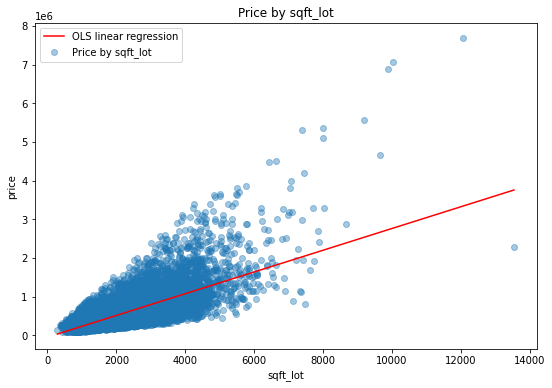

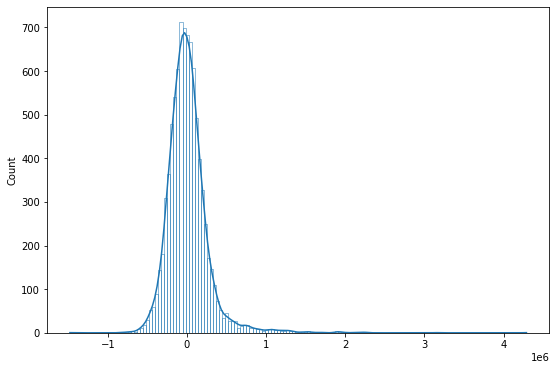

In [ ]:
from sklearn.model_selection import train_test_split

sqft_living = data['sqft_living'].values
price = data['price'].values

x_train, x_test, y_train, y_test= train_test_split(sqft_living, price, test_size=0.4, random_state=50)

model = LinearRegression()

model.fit(x_train.reshape(-1, 1), y_train)


demo_x_linear = np.array([x_test.min(), x_test.max()])
demo_y_linear = model.predict(demo_x_linear.reshape(-1, 1))

plt.figure(figsize = (9, 6))
plt.scatter(sqft_living, price, label = 'Price by sqft_lot', alpha = 0.4)
plt.plot(demo_x_linear, demo_y_linear, color = 'r', label = 'OLS linear regression')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('Price by sqft_lot')
plt.legend()

y_predicted = model.predict(x_test.reshape(-1,1))
# print(y_predicted)
errors = y_test - y_predicted
# plt.figure(figsize = (9, 6))
# plt.plot(errors)
plt.figure(figsize = (9, 6))
sns.histplot(x=errors,
             bins=150,
             fill=False,
             kde=True);

print('R2=',r2_score(y_test, y_predicted))
print('MSE=',mean_squared_error(y_test, y_predicted))
print('MAE=',mean_absolute_error(y_test, y_predicted))

model_cross =  LinearRegression()
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(model_cross, sqft_living.reshape(-1,1), price, cv=5)
print(scores.mean())





Сравним с регрессией основанной на данных 'без аномалий'

R2= 0.5004917908123813
MSE= 65833608864.48413
MAE= 171622.3023912972


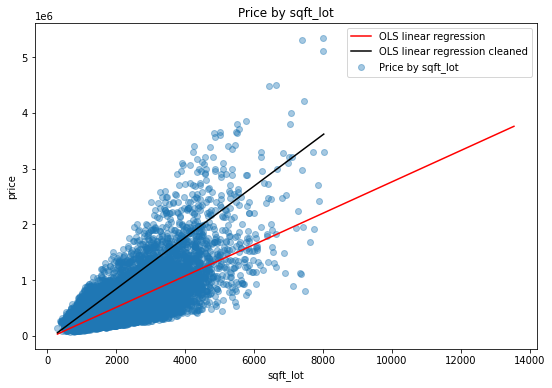

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(cleaned_sqft_living, cleaned_price, test_size=0.4, random_state=50)

model = LinearRegression()

model.fit(x_train.reshape(-1, 1), y_train)


cleaned_demo_x_linear = np.array([x_test.min(), x_test.max()])
cleaned_demo_y_linear = model.predict(demo_x_linear.reshape(-1, 1))

plt.figure(figsize = (9, 6))
plt.scatter(cleaned_sqft_living, cleaned_price, label = 'Price by sqft_lot', alpha = 0.4)
plt.plot(demo_x_linear, demo_y_linear, color = 'r', label = 'OLS linear regression')
plt.plot(cleaned_demo_x_linear, cleaned_demo_y_linear, color = 'k', label = 'OLS linear regression cleaned')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('Price by sqft_lot')
plt.legend()
y_predicted = model.predict(x_test.reshape(-1,1))
print('R2=',r2_score(y_test, y_predicted))
print('MSE=',mean_squared_error(y_test, y_predicted))
print('MAE=',mean_absolute_error(y_test, y_predicted))


**Регрессия Хьюбера**

Суть метода устойчивой регрессии заключается в уменьшении значимости отклонений, которые сильно влияют на модель. Согласно формуле выше, если модуль отклонения меньше или равен определённого уровня, то отклонение считается не большим, и функция в этой точке считается согласно верхней строки формулы, иначе отклонение считается большим и функция в этой точке считается согласно нижней части формулы.

R2= 0.4537919436126381
MSE= 74305394382.00266
MAE= 169535.72010252043


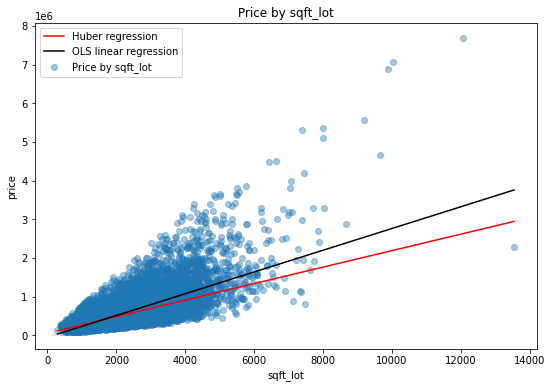

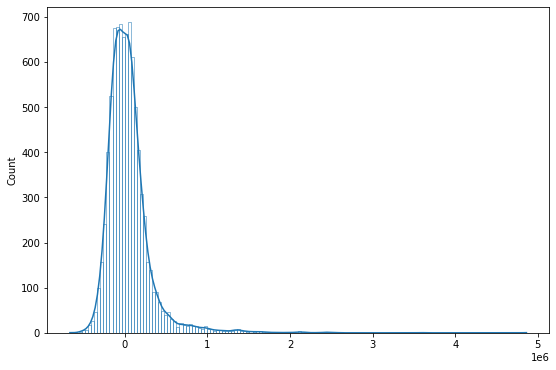

In [ ]:
from sklearn.linear_model import HuberRegressor

sqft_living = data['sqft_living'].values
price = data['price'].values

x_train, x_test, y_train, y_test= train_test_split(sqft_living, price, test_size=0.4, random_state=50)

modelHuber = HuberRegressor( alpha=1.0)

modelHuber.fit(x_train.reshape(-1, 1), y_train)


demo_x = np.array([x_test.min(), x_test.max()])
demo_y = modelHuber.predict(demo_x.reshape(-1, 1))

plt.figure(figsize = (9, 6))
plt.scatter(sqft_living, price, label = 'Price by sqft_lot', alpha = 0.4)
plt.plot(demo_x, demo_y, color = 'r', label = 'Huber regression')
plt.plot(demo_x_linear, demo_y_linear, color = 'k', label = 'OLS linear regression')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('Price by sqft_lot')
plt.legend()

y_predicted = modelHuber.predict(x_test.reshape(-1,1))
# print(y_predicted)
errors = y_test - y_predicted
# plt.figure(figsize = (9, 6))
# plt.plot(errors)
plt.figure(figsize = (9, 6))
sns.histplot(x=errors,
             bins=150,
             fill=False,
             kde=True);

print('R2=',r2_score(y_test, y_predicted))
print('MSE=',mean_squared_error(y_test, y_predicted))
print('MAE=',mean_absolute_error(y_test, y_predicted))


Сравним с регрессией основанной на данных 'без аномалий'

R2= 0.46230585076002084
MSE= 70866395504.00359
MAE= 166964.22508972927


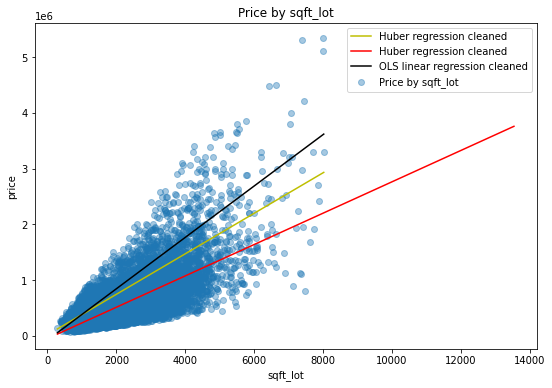

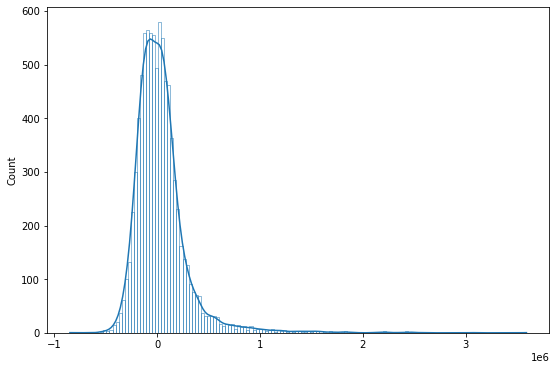

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(cleaned_sqft_living, cleaned_price, test_size=0.4, random_state=50)

modelHuber = HuberRegressor( alpha=1.0)

modelHuber.fit(x_train.reshape(-1, 1), y_train)


cleaned_demo_x = np.array([x_test.min(), x_test.max()])
cleaned_demo_y = modelHuber.predict(demo_x.reshape(-1, 1))

plt.figure(figsize = (9, 6))
plt.scatter(cleaned_sqft_living, cleaned_price, label = 'Price by sqft_lot', alpha = 0.4)
plt.plot(cleaned_demo_x, cleaned_demo_y, color = 'y', label = 'Huber regression cleaned')
plt.plot(demo_x, demo_y, color = 'r', label = 'Huber regression cleaned')
plt.plot(cleaned_demo_x_linear, cleaned_demo_y_linear, color = 'k', label = 'OLS linear regression cleaned')
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('Price by sqft_lot')
plt.legend()

y_predicted = modelHuber.predict(x_test.reshape(-1,1))
# print(y_predicted)
errors = y_test - y_predicted
# plt.figure(figsize = (9, 6))
# plt.plot(errors)
plt.figure(figsize = (9, 6))
sns.histplot(x=errors,
             bins=150,
             fill=False,
             kde=True);

print('R2=',r2_score(y_test, y_predicted))
print('MSE=',mean_squared_error(y_test, y_predicted))
print('MAE=',mean_absolute_error(y_test, y_predicted))

**Регрессия по методу Lasso**

Метод регрессии Лассо — метод оценивания коэффициентов линейной регрессионной модели.
Преимущества и недостатки

Преимущества:

• Прочная математическая основа.

• Более простая интерпретация по сравнению с МНК или Гребневой (Ridge) регрессией.

Недостатки:

• Как правило, зависимости имеют нелинейный характер => модель не сможет описать такую зависимость.

• Чувствителен к выбросам.

• Не имеет аналитического решения.

• Общее число отобранных переменных не может превышать размера обучающей выборки.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 364962835755607.9, tolerance: 14373746325083.215
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351359353330699.4, tolerance: 13888422565257.666
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 346240143607987.3, tolerance: 13686734294411.43
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3523538502

R2= 0.4538425107055123
MSE= 74298515304.0857
MAE= 169539.31681114816


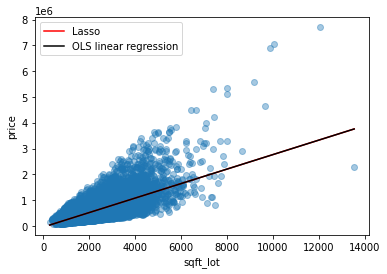

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

data_x  = data['sqft_living'].values
data_y  = data['price'].values

x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)

# Создаём модель Лассо
lasso = Lasso(max_iter = 10000, tol = 0.01)
# Создаём список параметров
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
# Ищем оптимальные значения параметра (подаём модель, список параметров, стратегию кросс-валидации)
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5) 
# Обучаем
lasso_regressor.fit(x_train.reshape(-1, 1), y_train) 

demo_x = np.array([x_test.min(), x_test.max()])
demo_y = lasso_regressor.predict(demo_x.reshape(-1, 1))
y_predicted = modelHuber.predict(x_test.reshape(-1,1))
# График
plt.scatter(data_x, data_y, alpha = 0.4)
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.plot(demo_x, demo_y, color = 'r', label = 'Lasso')
plt.plot(demo_x_linear, demo_y_linear, color = 'k', label = 'OLS linear regression')
plt.legend()
print('R2=',r2_score(y_test, y_predicted))
print('MSE=',mean_squared_error(y_test, y_predicted))
print('MAE=',mean_absolute_error(y_test, y_predicted))

Сравним с регрессией основанной на данных 'без аномалий'

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 337630267608803.5, tolerance: 12849037766420.645
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 335969464899726.3, tolerance: 12884158620626.88
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333154083545545.2, tolerance: 12711000951153.42
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33518499868

R2= 0.46230585076002084
MSE= 70866395504.00359
MAE= 166964.22508972927


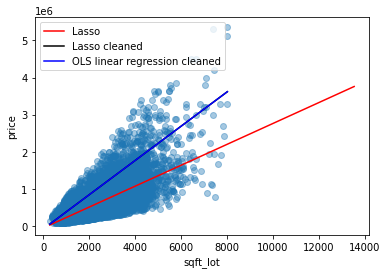

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(cleaned_sqft_living, cleaned_price, test_size=0.4, random_state=50)

# Создаём модель Лассо
lasso = Lasso(max_iter = 10000, tol = 0.01)
# Создаём список параметров
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
# Ищем оптимальные значения параметра (подаём модель, список параметров, стратегию кросс-валидации)
lasso_regressor = GridSearchCV(lasso, parameters, cv = 5) 
# Обучаем
lasso_regressor.fit(x_train.reshape(-1, 1), y_train) 

cleaned_demo_x = np.array([x_test.min(), x_test.max()])
cleaned_demo_y = lasso_regressor.predict(demo_x.reshape(-1, 1))
y_predicted = modelHuber.predict(x_test.reshape(-1,1))
# График
plt.scatter(cleaned_sqft_living, cleaned_price, alpha = 0.4)
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.plot(demo_x, demo_y, color = 'r', label = 'Lasso')
plt.plot(cleaned_demo_x, cleaned_demo_y, color = 'k', label = 'Lasso cleaned')
plt.plot(cleaned_demo_x_linear, cleaned_demo_y_linear, color = 'b', label = 'OLS linear regression cleaned')
plt.legend()
print('R2=',r2_score(y_test, y_predicted))
print('MSE=',mean_squared_error(y_test, y_predicted))
print('MAE=',mean_absolute_error(y_test, y_predicted))

**ElasticNet**

ElasticNet - модель регрессии с двумя регуляризаторами
Пусть известны измерения n объектов. Каждый объект представим в виде пары image.png image.png  image.png. Для удобства будем записывать это в матричном виде: (X, y) . Классическая задача регрессии ставится следующим образом:

image.png.
В силу неточности измерений данных или каких либо еще ошибок с целью построения наилучшей модели вводят регуляризатор или несколько регуляризаторов. Тогда получается следующая задача оптимизации:

image.png
Частными случаями являются модели лассо image.png и гребневой регрессии image.png. Для каждого фиксированногоimage.png можно перебрать все возможные значения параметра image.png (поскольку по этому параметру это кусочно-линейная функция с конечным числом точек, в которых она не дифференцируема)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 342587246491677.56, tolerance: 135143480722.62828
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 318338058469849.56, tolerance: 124820800397.42575
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 341288281763284.25, tolerance: 136251551175.69441
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321673

R2= 0.49447537717736356
MSE= 68770875913.28006
MAE= 175020.92657381474


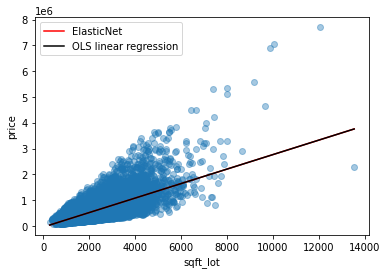

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(l1_ratio=0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 2e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20]}
elastic_regressor = GridSearchCV(elastic, parameters, cv=4) 

data_x  = data['sqft_living'].values
data_y  = data['price'].values

x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)

elastic_regressor.fit(x_train.reshape(-1, 1), y_train) 

demo_x = np.array([x_test.min(), x_test.max()])

demo_y = elastic_regressor.predict(demo_x.reshape(-1, 1))

demo_y_ = elastic_regressor.predict(x_test.reshape(-1, 1))


plt.scatter(data_x, data_y, alpha = 0.4)
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.plot(demo_x, demo_y, color = 'r', label = 'ElasticNet')
plt.plot(demo_x_linear, demo_y_linear, color = 'k', label = 'OLS linear regression')
plt.legend()
print('R2=',r2_score(y_test, demo_y_))
print('MSE=',mean_squared_error(y_test, demo_y_))
print('MAE=',mean_absolute_error(y_test, demo_y_))


Сравним с регрессией основанной на данных 'без аномалий'

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316643687363458.1, tolerance: 120428487339.62009
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 310054124692929.75, tolerance: 120115324244.14111
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 316598879913728.94, tolerance: 120336728112.77348
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3124005

R2= 0.5004909385382648
MSE= 65833721191.52862
MAE= 171621.56769182137


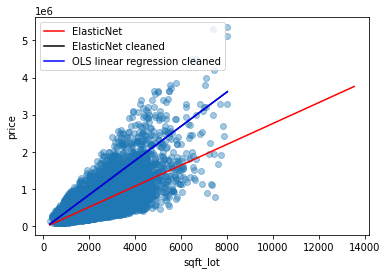

In [ ]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(l1_ratio=0.05)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 2e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20]}
elastic_regressor = GridSearchCV(elastic, parameters, cv=4) 

x_train, x_test, y_train, y_test= train_test_split(cleaned_sqft_living, cleaned_price, test_size=0.4, random_state=50)

elastic_regressor.fit(x_train.reshape(-1, 1), y_train) 

cleaned_demo_x = np.array([x_test.min(), x_test.max()])

cleaned_demo_y = elastic_regressor.predict(demo_x.reshape(-1, 1))

demo_y_ = elastic_regressor.predict(x_test.reshape(-1, 1))


plt.scatter(cleaned_sqft_living, cleaned_price, alpha = 0.4)
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.plot(demo_x, demo_y, color = 'r', label = 'ElasticNet')
plt.plot(cleaned_demo_x, cleaned_demo_y, color = 'k', label = 'ElasticNet cleaned')
plt.plot(cleaned_demo_x_linear, cleaned_demo_y_linear, color = 'b', label = 'OLS linear regression cleaned')
plt.legend()
print('R2=',r2_score(y_test, demo_y_))
print('MSE=',mean_squared_error(y_test, demo_y_))
print('MAE=',mean_absolute_error(y_test, demo_y_))

**Полиномиальная регрессия**

Полиномиальная регрессия — продвинутая версия линейной регрессии. Цель полиномиальной регрессии найти не просто линию, характеризующую данные, а некоторый полином n-й степени.

R2= 0.49121640174267034
MSE= 69214222458.83961
MAE= 168506.25792358472


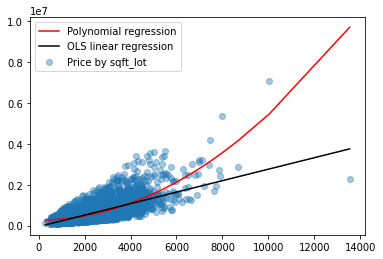

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Вычисление регрессии

x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)


plt.scatter(x_test, y_test, label = 'Price by sqft_lot', alpha = 0.4)
y_predicted =  pol_reg.predict(poly_reg.fit_transform(np.sort(x_test).reshape(-1, 1)))
y_predicted_ = pol_reg.predict(poly_reg.fit_transform((x_test).reshape(-1, 1)))
base_x_test = x_test
plt.plot(np.sort(x_test).reshape(-1, 1), y_predicted, color = 'red', label = 'Polynomial regression')
plt.plot(demo_x_linear, demo_y_linear, color = 'k', label = 'OLS linear regression')
plt.legend()

print('R2=',r2_score(y_test, y_predicted_))
print('MSE=',mean_squared_error(y_test, y_predicted_))
print('MAE=',mean_absolute_error(y_test, y_predicted_))

Сравним с регрессией основанной на данных 'без аномалий'

R2= 0.5379636937233581
MSE= 60894930071.47439
MAE= 165071.36381609953


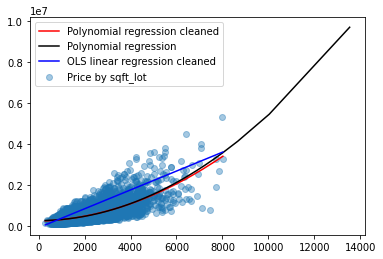

In [ ]:

x_train, x_test, y_train, y_test= train_test_split(cleaned_sqft_living, cleaned_price, test_size=0.4, random_state=50)

poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x_train.reshape(-1, 1))
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_train)


plt.scatter(x_test, y_test, label = 'Price by sqft_lot', alpha = 0.4)
cleaned_y_predicted =  pol_reg.predict(poly_reg.fit_transform(np.sort(x_test).reshape(-1, 1)))
y_predicted_ = pol_reg.predict(poly_reg.fit_transform((x_test).reshape(-1, 1)))

plt.plot(np.sort(x_test).reshape(-1, 1), cleaned_y_predicted, color = 'r', label = 'Polynomial regression cleaned')
plt.plot(np.sort(base_x_test).reshape(-1, 1), y_predicted, color = 'k', label = 'Polynomial regression ')
plt.plot(cleaned_demo_x_linear, cleaned_demo_y_linear, color = 'b', label = 'OLS linear regression cleaned')
plt.legend()

print('R2=',r2_score(y_test, y_predicted_))
print('MSE=',mean_squared_error(y_test, y_predicted_))
print('MAE=',mean_absolute_error(y_test, y_predicted_))

# **RANSAC**

RANSAC — это итерационный недетерминированный метод оценки параметров математической модели из набора наблюдаемых данных, содержащих шумы, когда шумы не должны оказывать никакого влияния на значения оценок. Поэтому его также можно интерпретировать как метод обнаружения шумов из-за устойчивости к зашумлённости исходных данных.

Входные данные алгоритма

На вход алгоритма поступает:

■ Набор исходных данных 𝑋;

■ Функция 𝑀, позволяющая вычислить параметры 𝜃 модели 𝑃 по набору данных из 𝑛 точек;

■ Функция оценки 𝐸 соответствия точек полученной модели;

■ Порог 𝑡 для функции оценки;

■ Количество итераций 𝑘 метода.

Достоинства и недостатки алгоритма

Преимущество:

Способность дать надёжную оценку параметров модели даже если в исходном наборе данных присутствует значительное количество выбросов.

Недостатки:

❑ Отсутствие верхней границы времени, необходимого для вычисления параметров модели;

❑ Для выполнения алгоритма необходимо задать конкретное пороговое значение;

❑ Методом RANSAC можно определить только одну модель для определённого набора данных.

R2= -2.8708063023953785
MSE= 526579177132.9226
MAE= 573524.8624797594


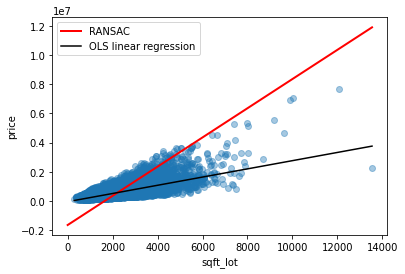

In [ ]:
from sklearn import linear_model

x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)

# Вычисление регрессии
ransac = linear_model.RANSACRegressor(residual_threshold=3)
ransac.fit(x_train.reshape(-1, 1), y_train)

base_line_x = np.linspace(0, x_test.max())
pred = ransac.predict(line_x.reshape(-1, 1))
y_demo =  ransac.predict(x_test.reshape(-1, 1))
plt.scatter(data_x, data_y, alpha = 0.4)
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.plot(base_line_x, pred, color='r', linewidth=2, label = 'RANSAC')
plt.plot(demo_x_linear, demo_y_linear, color = 'k', label = 'OLS linear regression')
plt.legend()

print('R2=',r2_score(y_test, y_demo))
print('MSE=',mean_squared_error(y_test, y_demo))
print('MAE=',mean_absolute_error(y_test, y_demo))

Сравним с регрессией основанной на данных 'без аномалий'

R2= 0.35688133377807074
MSE= 84761014827.68718
MAE= 222113.72596320722


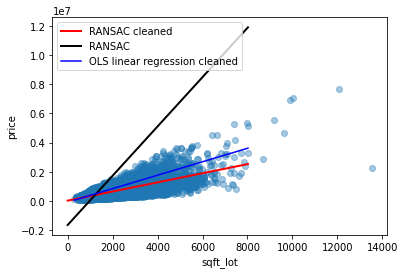

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(cleaned_sqft_living, cleaned_price, test_size=0.4, random_state=50)

# Вычисление регрессии
ransac = linear_model.RANSACRegressor(residual_threshold=3)
ransac.fit(x_train.reshape(-1, 1), y_train)

line_x = np.linspace(0, x_test.max())
cleaned_pred = ransac.predict(line_x.reshape(-1, 1))
y_demo =  ransac.predict(x_test.reshape(-1, 1))
plt.scatter(data_x, data_y, alpha = 0.4)
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.plot(line_x, cleaned_pred, color='r', linewidth=2, label = 'RANSAC cleaned')
plt.plot(line_x, pred, color='k', linewidth=2, label = 'RANSAC')
plt.plot(cleaned_demo_x_linear, cleaned_demo_y_linear, color = 'b', label = 'OLS linear regression cleaned')
plt.legend()

print('R2=',r2_score(y_test, y_demo))
print('MSE=',mean_squared_error(y_test, y_demo))
print('MAE=',mean_absolute_error(y_test, y_demo))

# **Гребневая регрессия**

Ridge-регрессия (гребневая регрессия) - это один из методов понижения размерности. Часто его применяют для борьбы с переизбыточностью данных, когда независимые переменные коррелируют друг с другом (т.е. имеет место мультиколлинеарность). Следствием этого является плохая обусловленность матрицы 𝑋 𝑇𝑋 и неустойчивость оценок коэффициентов регрессии. Оценки, например, могут иметь неправильный знак или значения, которые намного превосходят те, которые приемлемы из физических или практических соображений

beta0 =  -47729.00602287194
beta1 =  281.0968862752046
lambda = 0.0001


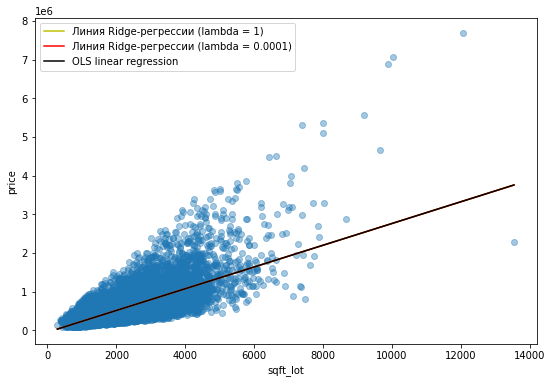

R2= 0.49447527727687157
MSE= 68770889503.60588
MAE= 175021.88250167487
best R2= 0.4944757112306982
best MSE= 68770830469.12286
best MAE= 175017.69321831022


In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)

# Вычисление регрессии
ridge_default = Ridge()
ridge_default.fit(x_train.reshape(-1, 1), y_train)

base_ridge_x = np.array([x_test.min(), x_test.max()])
default_y = ridge_default.predict(base_ridge_x.reshape(-1, 1))
default_y_ = ridge_default.predict(x_test.reshape(-1, 1))

ridge_best = RidgeCV(alphas=[1e-20, 1e-10, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10],normalize=True)
ridge_best.fit(x_train.reshape(-1, 1), y_train)
print('beta0 = ', ridge_best.intercept_)
print('beta1 = ', ridge_best.coef_[0])
print('lambda =',ridge_best.alpha_)

best_y = ridge_best.predict(base_ridge_x.reshape(-1, 1))
best_y_ = ridge_best.predict(x_test.reshape(-1, 1))

plt.figure(figsize = (9, 6))

plt.scatter(data_x, data_y, alpha = 0.4)
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.plot(base_ridge_x, default_y, label = 'Линия Ridge-регрессии (lambda = 1)', c = 'y')
plt.plot(base_ridge_x, best_y, label = 'Линия Ridge-регрессии (lambda = %.4f)' %(ridge_best.alpha_), c = 'r')
plt.plot(demo_x_linear, demo_y_linear, color = 'k', label = 'OLS linear regression')
plt.legend()
plt.show()


print('R2=',r2_score(y_test, default_y_))
print('MSE=',mean_squared_error(y_test, default_y_))
print('MAE=',mean_absolute_error(y_test, default_y_))

print('best R2=',r2_score(y_test, best_y_))
print('best MSE=',mean_squared_error(y_test, best_y_))
print('best MAE=',mean_absolute_error(y_test, best_y_))

Сравним с регрессией основанной на данных 'без аномалий'

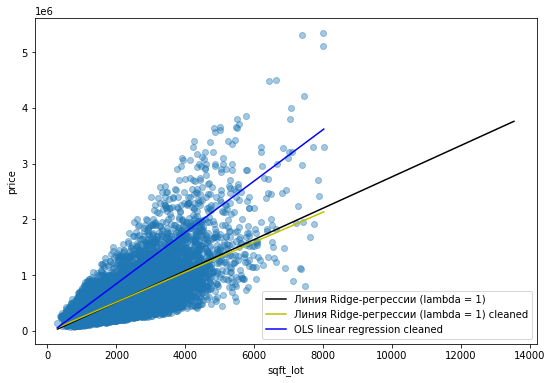

R2= 0.5004917908089226
MSE= 65833608864.93998
MAE= 171622.30238831474


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(cleaned_sqft_living, cleaned_price, test_size=0.4, random_state=50)

# Вычисление регрессии
ridge_default = Ridge()
ridge_default.fit(x_train.reshape(-1, 1), y_train)

ridge_x = np.array([x_test.min(), x_test.max()])
cleaned_default_y = ridge_default.predict(ridge_x.reshape(-1, 1))
default_y_ = ridge_default.predict(x_test.reshape(-1, 1))


plt.figure(figsize = (9, 6))

plt.scatter(cleaned_sqft_living, cleaned_price, alpha = 0.4)
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.plot(base_ridge_x, default_y, label = 'Линия Ridge-регрессии (lambda = 1)', c = 'k')
plt.plot(ridge_x, cleaned_default_y, label = 'Линия Ridge-регрессии (lambda = 1) cleaned', c = 'y')
plt.plot(cleaned_demo_x_linear, cleaned_demo_y_linear, color = 'b', label = 'OLS linear regression cleaned')
plt.legend()
plt.show()

print('R2=',r2_score(y_test, default_y_))
print('MSE=',mean_squared_error(y_test, default_y_))
print('MAE=',mean_absolute_error(y_test, default_y_))

Получается такая сводная таблица R2

 *#при каждом  запуске RANSAC, R2 разный, показан наилучший*

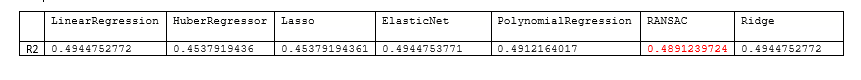
---

Судя по таблице, в данных экспириментах, Линейная регрессия показывает один из лучших результатов

Но если посмотреть на резудьтаты полученные на данных "без аномалий", 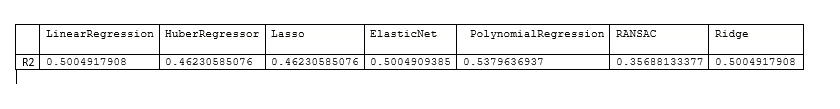

то видно, что полиномиальная регрессия справляется значительно лучше остальных

### Задача классификации


Задача классифика́ции — задача, в которой имеется множество объектов (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся. Это множество называется выборкой. Классовая принадлежность остальных объектов неизвестна. 




# **# Метод k-ближайших соседей**
Метод k-ближайших соседей (англ. k-nearest neighbors algorithm, k-NN) — метрический алгоритм для автоматической классификации объектов или регрессии.

В случае использования метода для классификации объект присваивается тому классу, который является наиболее распространённым среди k соседей данного элемента, классы которых уже известны. 

Алгоритм может быть применим к выборкам с большим количеством атрибутов (многомерным). Для этого перед применением нужно определить функцию расстояния; классический вариант такой функции — евклидова метрика

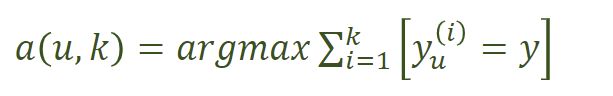

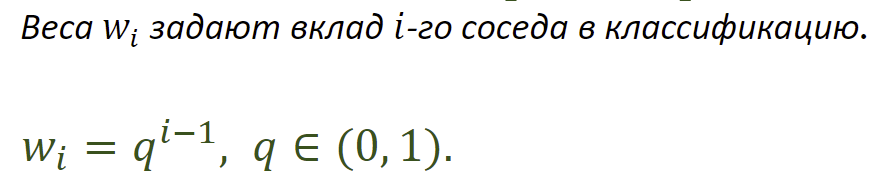

# Недостатки

1.   Хранение всей обучающей выборки:  неэффективный расход памяти и чрезмерное усложнение решающего правила.
2.   Cравнение классифицируемого объекта со всеми объектами выборки –следует использовать эффективные алгоритмы поиска ближайших соседей.
3. Мало параметров для настройки алгоритма по данным (как и у большинства метрических алгоритмов).


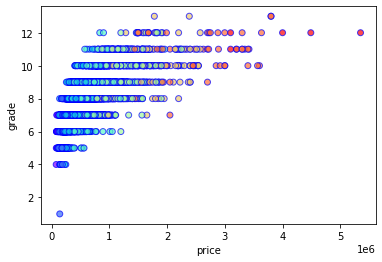

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
data_x  = data['price'].values
data_y  = data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train.reshape(-1, 1), y_train)
y = neigh.predict(x_test.reshape(-1, 1))

plt.xlabel('price')
plt.ylabel('grade')
plt.scatter(x_test.reshape(-1, 1), y_test, c=neigh.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

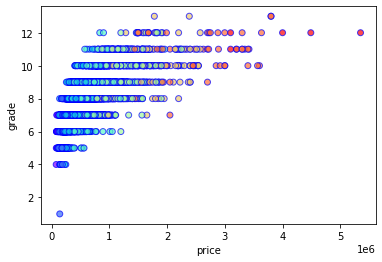

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
data_x  = cleaned_data['price'].values
data_y  = cleaned_data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(x_train.reshape(-1, 1), y_train)
y = neigh.predict(x_test.reshape(-1, 1))

plt.xlabel('price')
plt.ylabel('grade')
plt.scatter(x_test.reshape(-1, 1), y_test, c=neigh.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

# **Radius neighbors classification**

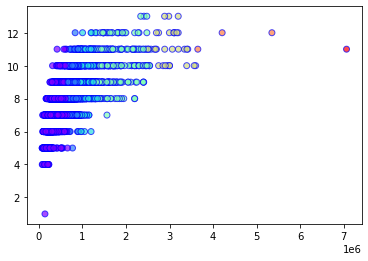

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

data_x  = data['price'].values
data_y  = data['grade'].values.astype(int)

x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



r_neigh = RadiusNeighborsClassifier(radius = 300000)
r_neigh.fit(x_train.reshape(-1, 1), y_train)
y = r_neigh.predict(x_test.reshape(-1, 1))


plt.scatter(x_test.reshape(-1, 1), y_test, c=r_neigh.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

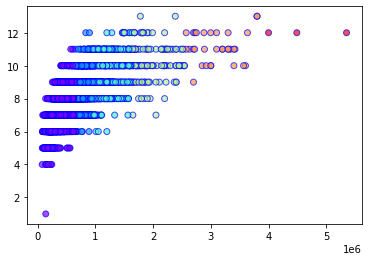

In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

data_x  = cleaned_data['price'].values
data_y  = cleaned_data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



r_neigh = RadiusNeighborsClassifier(radius = 300000)
r_neigh.fit(x_train.reshape(-1, 1), y_train)
y = r_neigh.predict(x_test.reshape(-1, 1))


plt.scatter(x_test.reshape(-1, 1), y_test, c=r_neigh.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

# **SVC**

Классификатор применяющий метод опорных векторов
Основная идея метода — перевод исходных векторов в пространство более высокой размерности и поиск разделяющей гиперплоскости с наибольшим зазором в этом пространстве. Две параллельных гиперплоскости строятся по обеим сторонам гиперплоскости, разделяющей классы. Разделяющей гиперплоскостью будет гиперплоскость, создающая наибольшее расстояние до двух параллельных гиперплоскостей. Алгоритм основан на допущении, что чем больше разница или расстояние между этими параллельными гиперплоскостями, тем меньше будет средняя ошибка классификатора.



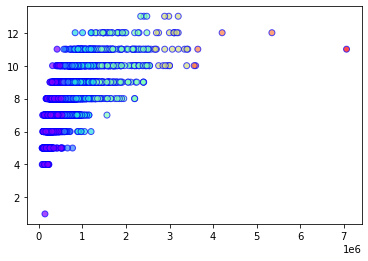

In [ ]:
from sklearn.svm import SVC
data_x  = data['price'].values
data_y  = data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



clf = SVC(kernel='rbf',degree=3, gamma='scale')
clf.fit(x_train.reshape(-1, 1), y_train)
#y = clf.predict(x_test.reshape(-1, 1))

plt.scatter(x_test.reshape(-1, 1), y_test, c=clf.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

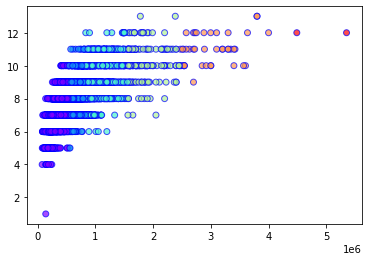

In [ ]:
from sklearn.svm import SVC
data_x  = cleaned_data['price'].values
data_y  = cleaned_data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



clf = SVC(kernel='rbf',degree=3, gamma='scale')
clf.fit(x_train.reshape(-1, 1), y_train)
#y = clf.predict(x_test.reshape(-1, 1))

plt.scatter(x_test.reshape(-1, 1), y_test, c=clf.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

# **LinearSVC**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


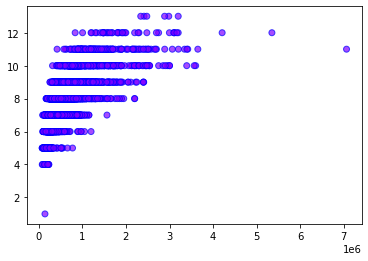

In [ ]:
from sklearn.svm import LinearSVC

data_x  = data['price'].values
data_y  = data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



l_clf = LinearSVC()
l_clf.fit(x_train.reshape(-1, 1), y_train)

plt.scatter(x_test.reshape(-1, 1), y_test, c=l_clf.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


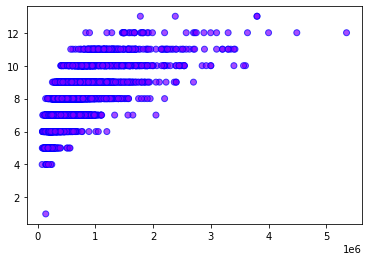

In [ ]:
from sklearn.svm import LinearSVC

data_x  = cleaned_data['price'].values
data_y  = cleaned_data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



l_clf = LinearSVC()
l_clf.fit(x_train.reshape(-1, 1), y_train)

plt.scatter(x_test.reshape(-1, 1), y_test, c=l_clf.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

# **GaussianNB**

Наивный байесовский классификатор

Наи́вный ба́йесовский классифика́тор — простой вероятностный классификатор, основанный на применении теоремы Байеса со строгими (наивными) предположениями о независимости.

В зависимости от точной природы вероятностной модели, наивные байесовские классификаторы могут обучаться очень эффективно. Во многих практических приложениях для оценки параметров для наивных байесовых моделей используют метод максимального правдоподобия; другими словами, можно работать с наивной байесовской моделью, не веря в байесовскую вероятность и не используя байесовские методы.

Несмотря на наивный вид и, несомненно, очень упрощенные условия, наивные байесовские классификаторы часто работают намного лучше нейронных сетей во многих сложных жизненных ситуациях.

Достоинством наивного байесовского классификатора является малое количество данных, необходимых для обучения, оценки параметров и классификации.

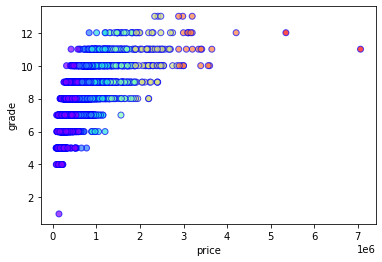

In [ ]:
from sklearn.naive_bayes import GaussianNB

data_x  = data['price'].values
data_y  = data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



gnb= GaussianNB()
gnb.fit(x_train.reshape(-1, 1), y_train)
y = gnb.predict(x_test.reshape(-1, 1))

plt.xlabel('price')
plt.ylabel('grade')
plt.scatter(x_test.reshape(-1, 1), y_test, c=gnb.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

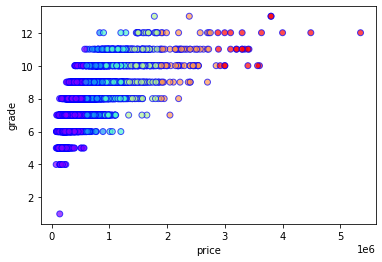

In [ ]:
from sklearn.naive_bayes import GaussianNB

data_x  = cleaned_data['price'].values
data_y  = cleaned_data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



gnb= GaussianNB()
gnb.fit(x_train.reshape(-1, 1), y_train)
y = gnb.predict(x_test.reshape(-1, 1))

plt.xlabel('price')
plt.ylabel('grade')
plt.scatter(x_test.reshape(-1, 1), y_test, c=gnb.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

# **DecisionTreeClassifier**

Дерево принятия решений (также называют деревом классификации или регрессионным деревом) — средство поддержки принятия решений, использующееся в машинном обучении, анализе данных и статистике. Структура дерева представляет собой «листья» и «ветки». На рёбрах («ветках») дерева решения записаны признаки, от которых зависит целевая функция, в «листьях» записаны значения целевой функции, а в остальных узлах — признаки, по которым различаются случаи. Чтобы классифицировать новый случай, надо спуститься по дереву до листа и выдать соответствующее значение.

Цель состоит в том, чтобы создать модель, которая предсказывает значение целевой переменной на основе нескольких переменных на входе.


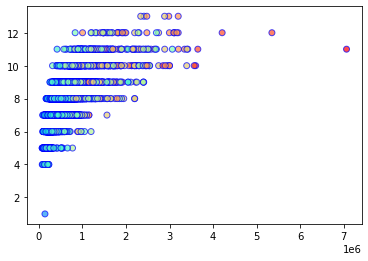

In [ ]:
from sklearn.tree import DecisionTreeClassifier

data_x  = data['price'].values
data_y  = data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



dtc= DecisionTreeClassifier()
dtc.fit(x_train.reshape(-1, 1), y_train)
y = dtc.predict(x_test.reshape(-1, 1))

plt.scatter(x_test.reshape(-1, 1), y_test, c=dtc.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

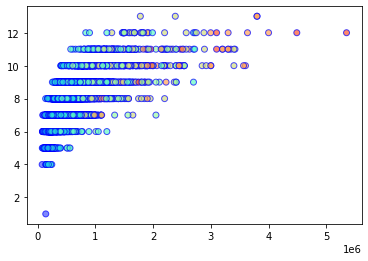

In [ ]:
from sklearn.tree import DecisionTreeClassifier

data_x  = cleaned_data['price'].values
data_y  = cleaned_data['grade'].values.astype(int)
x_train, x_test, y_train, y_test= train_test_split(data_x, data_y, test_size=0.4, random_state=50)



dtc= DecisionTreeClassifier()
dtc.fit(x_train.reshape(-1, 1), y_train)
y = dtc.predict(x_test.reshape(-1, 1))

plt.scatter(x_test.reshape(-1, 1), y_test, c=dtc.predict(x_test.reshape(-1, 1)), cmap='rainbow', alpha=0.7, edgecolors='b')

## **Вывод**

Лучше всех с данной задачей классификации справились методы  GaussianNB и RadiusNeighborsClassifier классы выглядят наиболее обособленно и чётко.

Так же можно сделать вывод, что очистка джанных от аномалий улучшает дальнеюшую точность работы алгоритмов, это справедливо как для задачи регрессии так и для задачи классификации

(array([0.        , 0.        , 0.        , 0.66666667, 0.66666667,
       1.        ]), array([0.        , 0.33333333, 0.66666667, 0.66666667, 1.        ,
       1.        ]), array([1.9 , 0.9 , 0.73, 0.39, 0.23, 0.14]))


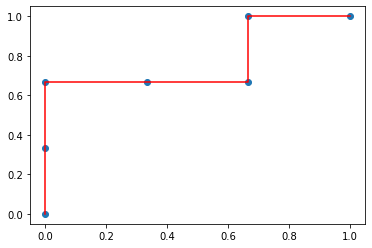

In [ ]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier


y = np.array([0,1,0,0,1,1])
scores = np.array([0.14, 0.23, 0.39, 0.54, 0.73, 0.9])
fpr, tpr, thresholds = roc_curve(y, scores, drop_intermediate = False)
roc_auc= auc(fpr, tpr)
print(roc_curve(y, scores))
plt.scatter(fpr, tpr)
plt.plot(fpr, tpr, c = 'r')
